<a href="https://colab.research.google.com/github/fereshtehdehkhoda/Time-Series/blob/main/azmon_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#soale 1 gozineye 4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("hw22.csv")
data.head()

,quarter,electricity_consumption
0,1387-Q1,12574
1,1387-Q2,13338
2,1387-Q3,12821
3,1387-Q4,14511
4,1388-Q1,13392


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   quarter                  54 non-null     object
 1   electricity_consumption  54 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 996.0+ bytes


In [ ]:
np.sum(data.isnull(),axis=0)

quarter                    0
electricity_consumption    0
dtype: int64

In [ ]:
data['year']=data['quarter'].str.split('-',expand=True)[0].astype('int')

In [ ]:
data.head()

,quarter,electricity_consumption,year
0,1387-Q1,12574,1387
1,1387-Q2,13338,1387
2,1387-Q3,12821,1387
3,1387-Q4,14511,1387
4,1388-Q1,13392,1388


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   quarter                  54 non-null     object
 1   electricity_consumption  54 non-null     int64 
 2   year                     54 non-null     int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
data['season']=data['quarter'].str.split('-',expand=True)[1]

In [ ]:
data.head()

,quarter,electricity_consumption,year,season
0,1387-Q1,12574,1387,Q1
1,1387-Q2,13338,1387,Q2
2,1387-Q3,12821,1387,Q3
3,1387-Q4,14511,1387,Q4
4,1388-Q1,13392,1388,Q1


In [ ]:
data.shape

(54, 4)

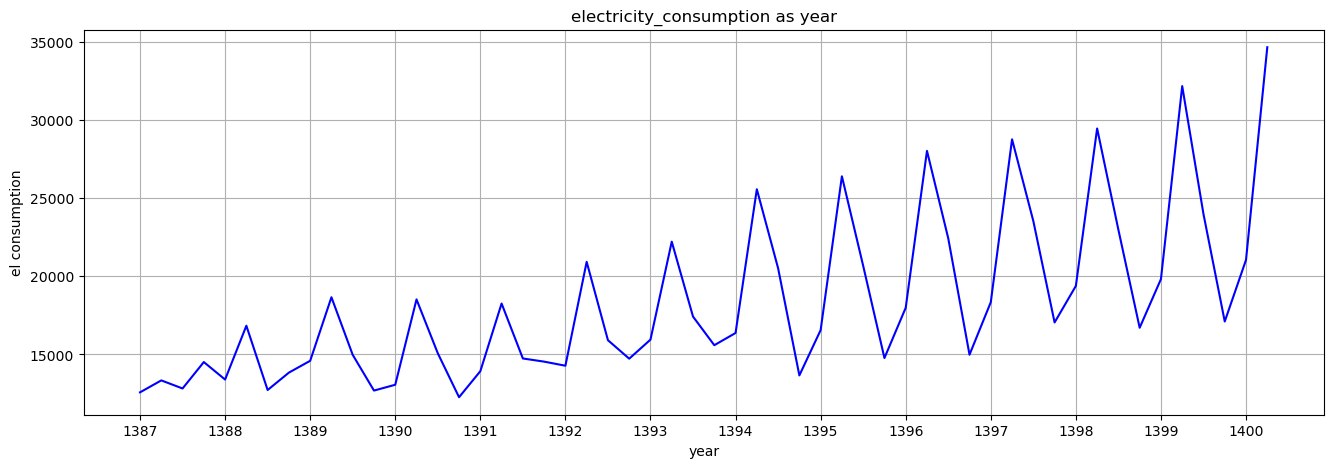

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(data['quarter'],data['electricity_consumption'],color='blue')
plt.title('electricity_consumption as year')
plt.xlabel('year')
plt.ylabel('el consumption')
plt.xticks(ticks=range(0, data.shape[0] + 1, 4),labels=range(1387,1401))
plt.grid()
plt.show()

In [ ]:
#trend va seasonality mashhod ast

In [ ]:
#-------------------------------------------------------------------------------------------------

In [ ]:
#soale 2 gozineye 1

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
add_decompose=seasonal_decompose(data['electricity_consumption'],
                                model='additive',
                                period=4,
                                two_sided=True)

In [ ]:
data['trend']=add_decompose.trend

In [ ]:
data[(data['season']=='Q1') & (data['year']==1388)]

,quarter,electricity_consumption,year,season,trend
4,1388-Q1,13392,1388,Q1,14377.25


In [ ]:
data['seasonality']=add_decompose.seasonal
data.head()

,quarter,electricity_consumption,year,season,trend,seasonality
0,1387-Q1,12574,1387,Q1,NaN,-2084.204527
1,1387-Q2,13338,1387,Q2,NaN,5446.868389
2,1387-Q3,12821,1387,Q3,13413.25,204.869992
3,1387-Q4,14511,1387,Q4,13952.50,-3567.533854
4,1388-Q1,13392,1388,Q1,14377.25,-2084.204527


In [ ]:
#soale 3 gozine 2

In [ ]:
data[(data['season']=='Q2')]

,quarter,electricity_consumption,year,season,trend,seasonality
1,1387-Q2,13338,1387,Q2,NaN,5446.868389
5,1388-Q2,16834,1388,Q2,14280.625,5446.868389
9,1389-Q2,18656,1389,Q2,15370.500,5446.868389
13,1390-Q2,18518,1390,Q2,14781.500,5446.868389
17,1391-Q2,18254,1391,Q2,15080.000,5446.868389
21,1392-Q2,20920,1392,Q2,16434.375,5446.868389
25,1393-Q2,22209,1393,Q2,17683.000,5446.868389
29,1394-Q2,25563,1394,Q2,19267.250,5446.868389
33,1395-Q2,26391,1395,Q2,19455.625,5446.868389
37,1396-Q2,28016,1396,Q2,20824.125,5446.868389


In [ ]:
#soale4 gozine 1

In [ ]:
from statsmodels.tsa.stattools import acf,pacf
acf_36=acf(data['electricity_consumption'],nlags=12)
pacf_36=pacf(data['electricity_consumption'],nlags=12)
print(acf_36)
print(pacf_36)

[ 1.          0.34624744 -0.06509466  0.34105417  0.82832785  0.25966017
 -0.09155808  0.26017073  0.67944702  0.18212313 -0.12497783  0.19571882
  0.55141331]
[ 1.          0.35278041 -0.21935149  0.56103519  0.81554477 -0.25637903
 -0.13409028 -0.2646253   0.17720031 -0.03245087 -0.0184851  -0.03523885
  0.02060381]


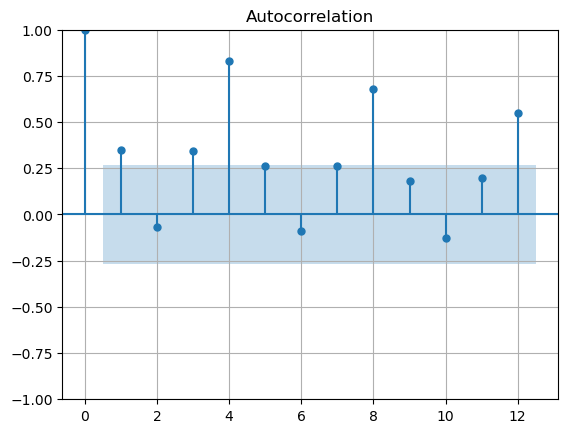

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['electricity_consumption'],lags=12,bartlett_confint = False)
plt.grid()
plt.show()

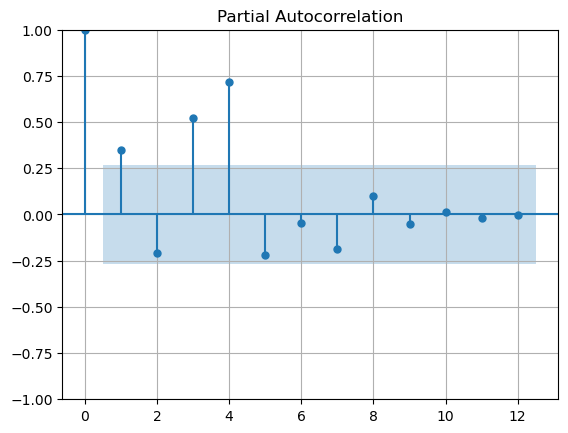

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data['electricity_consumption'],lags=12,method='ywm')
plt.grid()
plt.show()

In [ ]:
#soale5 gozine 3

In [ ]:
data.shape

(54, 6)

In [ ]:
data['trend']=np.arange(1,data.shape[0]+1)

In [ ]:
data.head()

,quarter,electricity_consumption,year,season,trend,seasonality
0,1387-Q1,12574,1387,Q1,1,-2084.204527
1,1387-Q2,13338,1387,Q2,2,5446.868389
2,1387-Q3,12821,1387,Q3,3,204.869992
3,1387-Q4,14511,1387,Q4,4,-3567.533854
4,1388-Q1,13392,1388,Q1,5,-2084.204527


In [ ]:
dummy_vars=pd.get_dummies(data['season']).reindex(columns=data['season'].unique())
dummy_vars.drop(columns='Q1',inplace=True)
dummy_vars.head()

,Q2,Q3,Q4
0,False,False,False
1,True,False,False
2,False,True,False
3,False,False,True
4,False,False,False


In [ ]:
dummy_vars.columns=[_.lower() for _ in dummy_vars.columns]
dummy_vars.head()

,q2,q3,q4
0,False,False,False
1,True,False,False
2,False,True,False
3,False,False,True
4,False,False,False


In [ ]:
data=pd.concat([data,dummy_vars],axis=1)
data.head()

,quarter,electricity_consumption,year,season,trend,seasonality,q2,q3,q4
0,1387-Q1,12574,1387,Q1,1,-2084.204527,False,False,False
1,1387-Q2,13338,1387,Q2,2,5446.868389,True,False,False
2,1387-Q3,12821,1387,Q3,3,204.869992,False,True,False
3,1387-Q4,14511,1387,Q4,4,-3567.533854,False,False,True
4,1388-Q1,13392,1388,Q1,5,-2084.204527,False,False,False


In [ ]:
lags=[1,3,4]
for i in range(len(lags)):
    data['lag_'+ str(lags[i])]=data['electricity_consumption'].shift(lags[i])

data.head()

,quarter,electricity_consumption,year,season,trend,seasonality,q2,q3,q4,lag_1,lag_3,lag_4
0,1387-Q1,12574,1387,Q1,1,-2084.204527,False,False,False,NaN,NaN,NaN
1,1387-Q2,13338,1387,Q2,2,5446.868389,True,False,False,12574.0,NaN,NaN
2,1387-Q3,12821,1387,Q3,3,204.869992,False,True,False,13338.0,NaN,NaN
3,1387-Q4,14511,1387,Q4,4,-3567.533854,False,False,True,12821.0,12574.0,NaN
4,1388-Q1,13392,1388,Q1,5,-2084.204527,False,False,False,14511.0,13338.0,12574.0


In [ ]:
data.drop(columns='seasonality',inplace=True)

In [ ]:
data.dropna(axis=0,inplace=True)
data.head()

,quarter,electricity_consumption,year,season,trend,q2,q3,q4,lag_1,lag_3,lag_4
4,1388-Q1,13392,1388,Q1,5,False,False,False,14511.0,13338.0,12574.0
5,1388-Q2,16834,1388,Q2,6,True,False,False,13392.0,12821.0,13338.0
6,1388-Q3,12723,1388,Q3,7,False,True,False,16834.0,14511.0,12821.0
7,1388-Q4,13836,1388,Q4,8,False,False,True,12723.0,13392.0,14511.0
8,1389-Q1,14591,1389,Q1,9,False,False,False,13836.0,16834.0,13392.0


In [ ]:
data.index=range(data.shape[0])
data.head()

,quarter,electricity_consumption,year,season,trend,q2,q3,q4,lag_1,lag_3,lag_4
0,1388-Q1,13392,1388,Q1,5,False,False,False,14511.0,13338.0,12574.0
1,1388-Q2,16834,1388,Q2,6,True,False,False,13392.0,12821.0,13338.0
2,1388-Q3,12723,1388,Q3,7,False,True,False,16834.0,14511.0,12821.0
3,1388-Q4,13836,1388,Q4,8,False,False,True,12723.0,13392.0,14511.0
4,1389-Q1,14591,1389,Q1,9,False,False,False,13836.0,16834.0,13392.0


In [ ]:
data.head()

,quarter,electricity_consumption,year,season,trend,q2,q3,q4,lag_1,lag_3,lag_4
0,1388-Q1,13392,1388,Q1,5,False,False,False,14511.0,13338.0,12574.0
1,1388-Q2,16834,1388,Q2,6,True,False,False,13392.0,12821.0,13338.0
2,1388-Q3,12723,1388,Q3,7,False,True,False,16834.0,14511.0,12821.0
3,1388-Q4,13836,1388,Q4,8,False,False,True,12723.0,13392.0,14511.0
4,1389-Q1,14591,1389,Q1,9,False,False,False,13836.0,16834.0,13392.0


In [ ]:
forecast_horizon=6
train=data.iloc[:-forecast_horizon,:]
test=data.iloc[-forecast_horizon :,:]

In [ ]:
train

,quarter,electricity_consumption,year,season,trend,q2,q3,q4,lag_1,lag_3,lag_4
0,1388-Q1,13392,1388,Q1,5,False,False,False,14511.0,13338.0,12574.0
1,1388-Q2,16834,1388,Q2,6,True,False,False,13392.0,12821.0,13338.0
2,1388-Q3,12723,1388,Q3,7,False,True,False,16834.0,14511.0,12821.0
3,1388-Q4,13836,1388,Q4,8,False,False,True,12723.0,13392.0,14511.0
4,1389-Q1,14591,1389,Q1,9,False,False,False,13836.0,16834.0,13392.0
5,1389-Q2,18656,1389,Q2,10,True,False,False,14591.0,12723.0,16834.0
6,1389-Q3,14973,1389,Q3,11,False,True,False,18656.0,13836.0,12723.0
7,1389-Q4,12688,1389,Q4,12,False,False,True,14973.0,14591.0,13836.0
8,1390-Q1,13059,1390,Q1,13,False,False,False,12688.0,18656.0,14591.0
9,1390-Q2,18518,1390,Q2,14,True,False,False,13059.0,14973.0,18656.0


In [ ]:
test

,quarter,electricity_consumption,year,season,trend,q2,q3,q4,lag_1,lag_3,lag_4
44,1399-Q1,19817,1399,Q1,49,False,False,False,16704.0,29449.0,19380.0
45,1399-Q2,32157,1399,Q2,50,True,False,False,19817.0,22967.0,29449.0
46,1399-Q3,23972,1399,Q3,51,False,True,False,32157.0,16704.0,22967.0
47,1399-Q4,17105,1399,Q4,52,False,False,True,23972.0,19817.0,16704.0
48,1400-Q1,21045,1400,Q1,53,False,False,False,17105.0,32157.0,19817.0
49,1400-Q2,34645,1400,Q2,54,True,False,False,21045.0,23972.0,32157.0


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
es = ExponentialSmoothing(train['electricity_consumption'],
                          trend = 'add',
                          damped_trend = False,
                          seasonal = 'add',
                          seasonal_periods = 4,
                          initialization_method = 'estimated',
                          initial_level = None,
                          initial_trend = None,
                          initial_seasonal = None)
model_1 = es.fit()

In [ ]:
model_1.params

{'smoothing_level': 0.13186912692983702,
 'smoothing_trend': 0.11053935749156828,
 'smoothing_seasonal': 0.6846950252182438,
 'damping_trend': nan,
 'initial_level': 14253.703284617171,
 'initial_trend': 169.9226370799578,
 'initial_seasons': array([-1251.84619032,  3323.40236795,  -902.0401935 , -1745.25103637]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
#soale 6 gozine 1

In [ ]:
#soale 7 gozineye 1

In [ ]:
pred_es_fw=model_1.forecast(steps=6)
pred_es_fw

44    19918.355971
45    30035.762170
46    23904.524080
47    18157.405476
48    20687.155126
49    30804.561324
dtype: float64

In [ ]:
abs_pre_err_es_fw=np.round(abs(test['electricity_consumption']-pred_es_fw)/test['electricity_consumption'] *100,1)
abs_pre_err_es_fw.mean()

4.3999999999999995

In [ ]:
#soale 8 gozineye 2

In [ ]:
test.index

RangeIndex(start=44, stop=50, step=1)

In [ ]:
history=list(train['electricity_consumption'])
pred_es_ew=[]
for t in test.index:
    es = ExponentialSmoothing(history,
                          trend = 'add',
                          damped_trend = False,
                          seasonal = 'add',
                          seasonal_periods = 4,
                          initialization_method = 'estimated',
                          initial_level = None,
                          initial_trend = None,
                          initial_seasonal = None)
    model_2=es.fit()
    pred_es_ew.append(model_2.forecast(steps=1)[0])
    history.append(test.loc[t,'electricity_consumption'])


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
pred_es_ew

[19918.355971220313,
 30010.30430330016,
 24260.366123913995,
 17944.316746563247,
 20842.54709320877,
 32540.236866869833]

In [ ]:
abs_pre_err_es_ew=np.round(abs(pred_es_ew-test['electricity_consumption'])/test['electricity_consumption']*100,1)
abs_pre_err_es_ew.mean()

3.4

In [ ]:
#soale9 gozineye 4

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   quarter                  44 non-null     object 
 1   electricity_consumption  44 non-null     int64  
 2   year                     44 non-null     int32  
 3   season                   44 non-null     object 
 4   trend                    44 non-null     int32  
 5   q2                       44 non-null     bool   
 6   q3                       44 non-null     bool   
 7   q4                       44 non-null     bool   
 8   lag_1                    44 non-null     float64
 9   lag_3                    44 non-null     float64
 10  lag_4                    44 non-null     float64
dtypes: bool(3), float64(3), int32(2), int64(1), object(2)
memory usage: 2.7+ KB


In [ ]:
X_train=train.iloc[:,4:]
y_train=train['electricity_consumption']

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   trend   44 non-null     int32  
 1   q2      44 non-null     bool   
 2   q3      44 non-null     bool   
 3   q4      44 non-null     bool   
 4   lag_1   44 non-null     float64
 5   lag_3   44 non-null     float64
 6   lag_4   44 non-null     float64
dtypes: bool(3), float64(3), int32(1)
memory usage: 1.5 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)

In [ ]:
val_period=2*4
idn=np.arange(len(X_train_scaled))
cv_splits = [(idn[: i], idn[i : i + 1]) for i in range(len(X_train_scaled) - val_period, len(X_train_scaled))]
cv_splits

[(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35]),
  array([36])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35, 36]),
  array([37])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35, 36, 37]),
  array([38])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35, 36, 37, 38]),
  array([39])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35, 36, 37, 38, 39]),
  array([40])),
 (array([ 0,  1

In [ ]:
len(cv_splits)

8

In [ ]:
from sklearn.linear_model import LinearRegression
model_3=LinearRegression()
from sklearn.feature_selection import RFECV
rfe=RFECV(LinearRegression(),cv=cv_splits,scoring='neg_root_mean_squared_error')
rfe.fit(X_train_scaled,y_train)
selected_features_ind=np.where(rfe.support_)
selected_features_ind

(array([0, 1, 3, 4, 6], dtype=int64),)

In [ ]:
#soale 10 gozineye 4

In [ ]:
X_test=test.iloc[:,4:]
X_test

,trend,q2,q3,q4,lag_1,lag_3,lag_4
44,49,False,False,False,16704.0,29449.0,19380.0
45,50,True,False,False,19817.0,22967.0,29449.0
46,51,False,True,False,32157.0,16704.0,22967.0
47,52,False,False,True,23972.0,19817.0,16704.0
48,53,False,False,False,17105.0,32157.0,19817.0
49,54,True,False,False,21045.0,23972.0,32157.0


In [ ]:
history_x=X_train.iloc[:,selected_features_ind[0]].copy()
history_y=y_train.copy()
X_test_selected_features=X_test.iloc[:,selected_features_ind[0]].copy()

pred_fwd_ew=[]
for t in test.index:
    model_3=LinearRegression()
    model_3.fit(history_x,history_y)
    pred_fwd_ew.append(model_3.predict(X_test_selected_features.loc[t,:].to_frame().T)[0])
    history_x.loc[t,:]=X_test_selected_features.loc[t,:]
    history_y[t]=test.loc[t,'electricity_consumption']

In [ ]:
pred_fwd_ew

[20122.844797250287,
 30029.680732365632,
 24349.671976090707,
 17946.16039191065,
 20667.492431538434,
 32707.027853797714]

In [ ]:
abs_pct_err_fwd_ew=np.round(abs(test['electricity_consumption']-pred_fwd_ew)/test['electricity_consumption'],1)
abs_pct_err_fwd_ew.mean()*100

3.3333333333333335